# PG_Test_1 :  5 systems and 100 samples each.
* So, we first need to generate the data 
  * Rossler, Lorenz63, Aizawa, Sprott and Dadras
* Then calculate the chaotic features and the tsfresh features
* Normalize (Scale) 
* Variance Filtering
* Visualization using PCA, t-SNE and UMAP

# Step 1: Data Generation

In [50]:
import pandas as pd

def transition(df,freq):
  df = df.copy()
  df['date'] = pd.date_range(start='1970-01-01', periods=len(df), freq=freq)
  df = df.set_index('date')
  df = df.asfreq(freq)
  # Rename the 'Demand' column to 'y' in the DataFrame
  df = df.rename(columns = {'y': 'exo_1', 'z' : 'exo_2'})
  df = df.rename(columns = {'x': 'y'})
  df_transitioned = df

  return df_transitioned

### GENESIS

In [51]:
import json
import numpy as np
# from utils.helpers import sys_params_gen as params_gen
# from utils.helpers import initial_conditions_gen as ic_gen
# from data_generation.binder import Binder  
# from data_generation.tsdg import Sistema  
import os

In [52]:
file_path = '/home/think/Desktop/TESIS/pg_runs/templates/template.json'
destination_path = "/home/think/Desktop/TESIS/pg_runs/pg_test_2"

In [54]:
with open(file_path, 'r') as file:
    config = json.load(file)
    # Control variables
    mode = config['run_mode']
    warden = config['warden']
    models = config['models']
    shared_parameters = config['shared_parameters']

    # Extract the variables we need from the shared_parameters
    test_number = shared_parameters["test_number"]
    number_of_child_systems = shared_parameters["number_of_child_systems"]  
    t_span = tuple(shared_parameters["t_span"])
    num_points = shared_parameters["num_points"]  
    initial_conditions = shared_parameters["initial_conditions"]  
    t_eval = np.linspace(t_span[0], t_span[1], num_points)

In [55]:
print(mode)

global


In [56]:
print(warden)

{'aizawa': True, 'chen': False, 'chua': False, 'dadras': True, 'four_wing': False, 'halvorsen': False, 'lorenz63': True, 'lorenz83': False, 'ravinoch_fabrikant': False, 'rossler': True, 'sprott': True, 'thomas': False, 'tsucs': False}


In [57]:
print(models)

{'aizawa': {'params': {'a': [0.95, 1.1], 'b': [0.7, 0.9], 'c': [0.6, 0.8], 'd': [3.5, 4], 'e': [0.25, 0.3], 'f': [0.1, 0.2]}}, 'chen': {'params': {'alpha': [40, 5.1], 'beta': [-10, -9.99], 'delta': [-0.38, -0.37]}}, 'chua': {'params': {'sigma': [10, 15], 'beta': [2.66666666, 7], 'rho': [28.5, 70]}}, 'dadras': {'params': {'a': [3, 4], 'b': [2.7, 3], 'c': [1.7, 2], 'd': [2, 3], 'e': [9, 10]}}, 'four_wing': {'params': {'a': [0.2, 0.4], 'b': [0.01, 0.03], 'c': [-0.4, -0.3]}}, 'halvorsen': {'params': {'a': [1.89, 1.95]}}, 'lorenz63': {'params': {'sigma': [10, 15], 'beta': [2.66666666, 7], 'rho': [28.5, 70]}}, 'lorenz83': {'params': {'a': [0.95, 1], 'b': [7.91, 8.91], 'f': [4.83, 5.83], 'g': [4.66, 5.66]}}, 'ravinoch_fabrikant': {'params': {'alpha': [0.14, 0.6], 'gamma': [0.1, 0.4]}}, 'rossler': {'params': {'a': [0.2, 0.3], 'b': [0.2, 0.3], 'c': [5.7, 5.8]}}, 'sprott': {'params': {'a': [2.07, 2.3], 'b': [1.79, 2]}}, 'thomas': {'params': {'b': [0.20808186, 0.30808186]}}, 'tsucs': {'params': {

In [58]:
print(shared_parameters)

{'test_number': 2, 'number_of_child_systems': 100, 'kind_step': 'even', 't_span': [0, 105], 'num_points': 10000, 'initial_conditions': {'x': {'min': 0.1, 'max': 1}, 'y': {'min': 0.1, 'max': 1}, 'z': {'min': 0.1, 'max': 1}}}


In [59]:
print(test_number)

2


In [60]:
print(number_of_child_systems)

100


In [61]:
print(t_span)

(0, 105)


In [62]:
print(num_points)

10000


In [63]:
print(initial_conditions)

{'x': {'min': 0.1, 'max': 1}, 'y': {'min': 0.1, 'max': 1}, 'z': {'min': 0.1, 'max': 1}}


In [64]:
print(t_eval)

[0.00000000e+00 1.05010501e-02 2.10021002e-02 ... 1.04978998e+02
 1.04989499e+02 1.05000000e+02]


In [65]:
def frange(start, stop, step):
    while start <= stop:
        yield round(start, 10)  # Avoid floating-point errors
        start += step

In [66]:
def initial_conditions_gen(initial_conditions, number_of_child_systems):

  child_initial_conditions_bag = {}

  for key, value in initial_conditions.items():
    # Retrieve the dynamically created min and max values from the global namespace
    min_value = value["min"]
    max_value = value["max"]
    step = (max_value - min_value) / number_of_child_systems
    gen = frange(min_value, max_value, step)
    child_initial_conditions_bag.update({f"{key}": np.fromiter(gen, dtype=float)})

  systems_initial_dict = {}
  w = []
  for value in child_initial_conditions_bag.values():
    w.append(len(value))
  for i in range(min(w)):
    y = []
    for key,value in child_initial_conditions_bag.items():
      y.append(value[i])
    systems_initial_dict[f"initial_condition_{i}"] = y
  
  return systems_initial_dict

In [67]:
# Initial conditions for each system
systems_initial_dict = initial_conditions_gen(initial_conditions, number_of_child_systems)

In [68]:
systems_initial_dict

{'initial_condition_0': [0.1, 0.1, 0.1],
 'initial_condition_1': [0.109, 0.109, 0.109],
 'initial_condition_2': [0.118, 0.118, 0.118],
 'initial_condition_3': [0.127, 0.127, 0.127],
 'initial_condition_4': [0.136, 0.136, 0.136],
 'initial_condition_5': [0.145, 0.145, 0.145],
 'initial_condition_6': [0.154, 0.154, 0.154],
 'initial_condition_7': [0.163, 0.163, 0.163],
 'initial_condition_8': [0.172, 0.172, 0.172],
 'initial_condition_9': [0.181, 0.181, 0.181],
 'initial_condition_10': [0.19, 0.19, 0.19],
 'initial_condition_11': [0.199, 0.199, 0.199],
 'initial_condition_12': [0.208, 0.208, 0.208],
 'initial_condition_13': [0.217, 0.217, 0.217],
 'initial_condition_14': [0.226, 0.226, 0.226],
 'initial_condition_15': [0.235, 0.235, 0.235],
 'initial_condition_16': [0.244, 0.244, 0.244],
 'initial_condition_17': [0.253, 0.253, 0.253],
 'initial_condition_18': [0.262, 0.262, 0.262],
 'initial_condition_19': [0.271, 0.271, 0.271],
 'initial_condition_20': [0.28, 0.28, 0.28],
 'initial_cond

In [69]:
def system_params_gen(params, number_of_child_systems):

  child_parameters_bag = {}

  for key, value in params.items():
      min_value = value["min"]
      max_value = value["max"]
      step = (max_value - min_value) / number_of_child_systems
      child_parameters_bag[key] = list(frange(min_value, max_value, step))

  systems_params_dict = {}

  y = []
  for value in child_parameters_bag.values():
    y.append(len(value))
  for i in range(min(y)):
    y = []
    for key,value in child_parameters_bag.items():
      y.append(value[i])
    systems_params_dict[f"system_{i}_params"] = tuple(y) 
  
  return systems_params_dict  

In [31]:
import numpy as np
import importlib
from functools import partial

class Binder:
    def __init__(self, module_name, function_name, params):
    
        self.module_name = module_name
        self.function_name = function_name
        self.params = params
        self.module = None
        self.prepared_function = None

    def import_module(self):
        """Imports the module and assigns it to self.module."""
        self.module = importlib.import_module(self.module_name)
        #print(f"Module {self.module_name} imported successfully.")
     
    def fixer(self):
        """Fixes parameters to the function and returns a partially applied function."""
        if self.module is None:
            print("You have to import_module first :)")
            return None
        
        func = getattr(self.module, self.function_name, None)
        if func is None:
            print(f"Function {self.function_name} not found in module {self.module_name}.")
            return None

        self.prepared_function = partial(func, *self.params)
        return self.prepared_function

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import pandas as pd
import os
import matplotlib.animation as animation


class Sistema:

    """
    Clase para resolver ecuaciones diferenciales ordinarias (EDOs).

    Parámetros:
      - f: función que define el sistema de ecuaciones diferenciales (dy/dt = f(t, y)).
      - y0: condición inicial (puede ser un número o un array para sistemas).
      - t: array de tiempos donde se evaluará la solución.
      - metodo: método numérico para la integración (por defecto "RK45").
    """


    def __init__(self, f, y0, t, metodo = "RK45"):
        self.f = f
        self.y0 = np.atleast_1d(y0)
        self.t = t
        self.metodo = metodo
        self.solucion = None

    def set_metodo(self, nuevo_metodo):

        """
        Permite cambiar el método de integración numérica.
        """

        self.metodo = nuevo_metodo
        print(f"Método cambiado a {self.metodo}")

    def resolver(self):

        """Resuelve la EDO utilizando el método numérico definido."""

        self.solucion = solve_ivp(self.f, [self.t[0], self.t[-1]], self.y0,
                                    t_eval=self.t, method=self.metodo)
        return self.solucion
    
    def atractor_animation(self):
        
        sol = self.solucion  
        x, y, z = sol.y  # Extract trajectory data

        # Set up the figure and 3D axis
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlim((np.min(x), np.max(x)))
        ax.set_ylim((np.min(y), np.max(y)))
        ax.set_zlim((np.min(z), np.max(z)))
        ax.set_title("Attractor Animation")

        # Initialize the plot elements
        trail_length = 150  # Number of points in fading trace
        line, = ax.plot([], [], [], 'r-', lw=1)  # Main trajectory
        trace, = ax.plot([], [], [], 'g-', lw=2, alpha=0.7)  # Fading trace
        point, = ax.plot([], [], [], 'bo', markersize=6)  # Moving point

        def update(i):
            if i < trail_length:
                trace_x = x[:i]
                trace_y = y[:i]
                trace_z = z[:i]
            else:
                trace_x = x[i - trail_length:i]
                trace_y = y[i - trail_length:i]
                trace_z = z[i - trail_length:i]

            # 🛠 Fix: Only apply fading if the trace has points
            if len(trace_x) > 0:
                fade_alpha = np.linspace(0.1, 1.0, len(trace_x))  # Gradient fade
                trace.set_alpha(fade_alpha[0])  # Apply fading effect

            # Update the trace
            trace.set_data(trace_x, trace_y)
            trace.set_3d_properties(trace_z)

            # Update main trajectory and moving point
            line.set_data(x[:i], y[:i])
            line.set_3d_properties(z[:i])
            point.set_data(x[i], y[i])
            point.set_3d_properties(z[i])

            return line, trace, point
        # Run animation
        ani = animation.FuncAnimation(fig, update, frames=len(self.t), interval=10, blit=False)

        plt.show()


        return
    def graficar(self, tipo='3d', guardar=False, show_plot=True, filename='plot.png'):
        """
        Genera la gráfica de la solución de la EDO.
        
        Parámetros:
        - tipo: '3d' para la trayectoria en 3D o 'series' para la serie de tiempo.
        - guardar: si True, guarda la gráfica en un archivo.
        - show_plot: si True, muestra la gráfica en pantalla.
        - filename: nombre del archivo donde se guardará la gráfica.
        
        Retorna el objeto figura (fig).
        """
        if self.solucion is None:
            raise ValueError("Primero debes resolver la ecuación.")

        if tipo == '3d':
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.plot(self.solucion.y[0], self.solucion.y[1], self.solucion.y[2],
                    color='purple', lw=0.5)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.set_title(f'Attractor (3D)')  # {self.f.func.__name__}
            ax.view_init(elev=30, azim=60)

        elif tipo == 'series':
            fig, axs = plt.subplots(self.solucion.y.shape[0], 1, figsize=(10, 8), sharex=True)
            labels = ['x', 'y', 'z']
            colors = ['r', 'g', 'b']

            for i in range(self.solucion.y.shape[0]):
                axs[i].plot(self.solucion.t, self.solucion.y[i], color=colors[i])
                axs[i].set_ylabel(labels[i])
                axs[i].grid()

            axs[-1].set_xlabel("Time")
            fig.suptitle(f"Series de Tiempo de {getattr(self.f, 'func', self.f).__name__}")

        else:
            raise ValueError("Tipo de gráfica no reconocido. Usa '3d' o 'series'.")

        plt.tight_layout()

        if guardar:
            directory = "/path/to/save/directory" 
            os.makedirs(directory, exist_ok=True)  
            full_path = os.path.join(directory, filename)
            fig.savefig(full_path)
            print(f"Gráfica guardada en {full_path}")

        if show_plot:
            plt.show()

        return fig
       
    # def csv_or_dataframe(self, filename = None):

    #     """Devuelve el dataframe de la series de tiempo, o un csv
    #      si es que le damos un nombre """
        
    #     if self.solucion is None:
    #         raise ValueError("Primero debes resolver la ecuación.")
        
    #     X = self.solucion.y[0]
    #     Y = self.solucion.y[1]
    #     Z = self.solucion.y[2]
     
    #     df = pd.DataFrame({'x':X,'y':Y,'z':Z })

    #     if filename:
    #         df.to_csv(filename, index=False)

    #     return df

    def csv_or_dataframe(self, filename=None, overwrite=True):
        """
        Devuelve el dataframe de la serie de tiempo, o lo guarda como CSV si se proporciona un nombre de archivo.
        Crea directorios si no existen. Puede sobrescribir el archivo si overwrite=True.

        Parameters
        ----------
        filename : str, optional
            Ruta completa del archivo donde se desea guardar el CSV.
        overwrite : bool, default=True
            Si True, sobrescribe el archivo CSV si ya existe. Si False, lanza una excepción si ya existe.
        """

        if self.solucion is None:
            raise ValueError("Primero debes resolver la ecuación.")

        X = self.solucion.y[0]
        Y = self.solucion.y[1]
        Z = self.solucion.y[2]

        df = pd.DataFrame({'x': X, 'y': Y, 'z': Z})

        if filename:
            # Crear directorios si no existen
            os.makedirs(os.path.dirname(filename), exist_ok=True)

            # Si no se permite sobrescribir y el archivo ya existe, lanzar error
            if not overwrite and os.path.exists(filename):
                raise FileExistsError(f"El archivo '{filename}' ya existe y overwrite=False.")

            df.to_csv(filename, index=False)

        return df


In [ ]:
# Here we decide which model is allowed to be muahahaha
for key, value in warden.items():
    if value == True:
        parent_model = key
        # Extracting parameters (and them ranges)
        params = {
            key: {"min": value[0], "max": value[1]} 
            for key, value in models[key]["params"].items()
            }
        # Parameters for each system
        systems_params_dict = sys_params_gen(params, number_of_child_systems)
        print(systems_params_dict)

        for i, ((_, v1), (_, v2)) in enumerate(zip(systems_params_dict.items(), systems_initial_dict.items())):
            # Initialize the Binder object for dynamic function import
            binder = Binder(module_name=f"systems.{parent_model}", 
                            function_name=parent_model, 
                            params=v1)

            # Import the module
            binder.import_module()

            # Prepare the function
            fixed_function = binder.fixer()

            if fixed_function:  
                # Now we have the fixed function ready, so we can pass it to Sistema
                sistema = Sistema(f=fixed_function, 
                                    y0=v2, 
                                    t=t_eval, 
                                    metodo='RK45')
                
                # Solve the system
                sistema.resolver()
                # Get the DataFrame for the solution
                ruta = os.path.join(f"{destination_path}",f"test_{test_number}",f"{parent_model}" ,f"{parent_model}_{i}.csv")
                print(f'{parent_model}_{i} has been generated \n at {ruta}')
                # Display a cutie plot
                #sistema.graficar(tipo='series', guardar=False, show_plot=True)
                # Display a cutie animation
                #sistema.atractor_animation()
                # Save dataframe in said route
                sistema.csv_or_dataframe(filename=ruta, overwrite=False)

{'system_0_params': (0.95, 0.7, 0.6, 3.5, 0.25, 0.1), 'system_1_params': (0.9515, 0.702, 0.602, 3.505, 0.2505, 0.101), 'system_2_params': (0.953, 0.704, 0.604, 3.51, 0.251, 0.102), 'system_3_params': (0.9545, 0.706, 0.606, 3.515, 0.2515, 0.103), 'system_4_params': (0.956, 0.708, 0.608, 3.52, 0.252, 0.104), 'system_5_params': (0.9575, 0.71, 0.61, 3.525, 0.2525, 0.105), 'system_6_params': (0.959, 0.712, 0.612, 3.53, 0.253, 0.106), 'system_7_params': (0.9605, 0.714, 0.614, 3.535, 0.2535, 0.107), 'system_8_params': (0.962, 0.716, 0.616, 3.54, 0.254, 0.108), 'system_9_params': (0.9635, 0.718, 0.618, 3.545, 0.2545, 0.109), 'system_10_params': (0.965, 0.72, 0.62, 3.55, 0.255, 0.11), 'system_11_params': (0.9665, 0.722, 0.622, 3.555, 0.2555, 0.111), 'system_12_params': (0.968, 0.724, 0.624, 3.56, 0.256, 0.112), 'system_13_params': (0.9695, 0.726, 0.626, 3.565, 0.2565, 0.113), 'system_14_params': (0.971, 0.728, 0.628, 3.57, 0.257, 0.114), 'system_15_params': (0.9725, 0.73, 0.63, 3.575, 0.2575, 0

# STEP 2: DATA PREPARATION

In [41]:
import os
import re
import pandas as pd

def crawl_csvs_with_ids(destination_path):
    """
    Lee todos los CSVs recursivamente en destination_path, asigna un ID único por archivo,
    reordena las columnas para poner 'id' primero, y devuelve:
    1. Un DataFrame concatenado.
    2. Un DataFrame de referencia con ['id', 'sample_name'].
    """

    all_files = []

    # Walk through files and gather full paths
    for root, _, files in os.walk(destination_path):
        for file in files:
            if file.endswith(".csv"):
                full_path = os.path.join(root, file)
                all_files.append(full_path)

    # Regex function to extract numeric suffix
    def extract_number(path):
        filename = os.path.splitext(os.path.basename(path))[0]
        match = re.search(r'(\d+)$', filename)
        return int(match.group(1)) if match else float('inf')  # inf pushes unsortables to end

    # Sort files by numeric suffix
    sorted_files = sorted(all_files, key=extract_number)

    all_data = []
    id_lookup = []

    for current_id, full_path in enumerate(sorted_files, start=1):
        try:
            df = pd.read_csv(full_path)
        except Exception as e:
            print(f"Error loading {full_path}: {e}")
            continue

        df.insert(0, 'id', current_id)  # Put 'id' as the first column
        all_data.append(df)

        file_stem = os.path.splitext(os.path.basename(full_path))[0]
        id_lookup.append({'id': current_id, 'sample_name': file_stem})

    if not all_data:
        raise ValueError(f"No se encontraron archivos CSV en {destination_path}")

    all_data_df = pd.concat(all_data, ignore_index=True)
    id_lookup_df = pd.DataFrame(id_lookup)

    return all_data_df, id_lookup_df


In [36]:
import os
import re
import pandas as pd

def crawl_csvs_with_ids(destination_path):
    """
    Lee todos los CSVs en destination_path recursivamente, ordenados naturalmente,
    les asigna un ID único, y devuelve:
    1. Un DataFrame concatenado con 'id' como primera columna.
    2. Un DataFrame de referencia con ['id', 'sample_name'].
    """

    all_files = []

    for root, _, files in os.walk(destination_path):
        for file in files:
            if file.endswith(".csv"):
                full_path = os.path.join(root, file)
                all_files.append(full_path)

    # Natural sort key: split text and numbers
    def natural_key(path):
        filename = os.path.splitext(os.path.basename(path))[0]
        return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', filename)]

    sorted_files = sorted(all_files, key=natural_key)

    all_data = []
    id_lookup = []

    for current_id, full_path in enumerate(sorted_files, start=1):
        try:
            df = pd.read_csv(full_path)
        except Exception as e:
            print(f"Error loading {full_path}: {e}")
            continue

        df.insert(0, 'id', current_id)
        all_data.append(df)

        file_stem = os.path.splitext(os.path.basename(full_path))[0]
        id_lookup.append({'id': current_id, 'sample_name': file_stem})

    if not all_data:
        raise ValueError(f"No se encontraron archivos CSV en {destination_path}")

    all_data_df = pd.concat(all_data, ignore_index=True)
    id_lookup_df = pd.DataFrame(id_lookup)

    return all_data_df, id_lookup_df



In [44]:
import os
import re
import pandas as pd

def crawl_csvs_with_ids(destination_path):
    """
    Lee todos los CSVs en destination_path recursivamente, ordenados naturalmente,
    les asigna un ID único, y devuelve:
    1. Un DataFrame concatenado con 'id' como primera columna.
    2. Un DataFrame de referencia con ['id', 'sample_name'].
    """

    all_files = []

    for root, _, files in os.walk(destination_path):
        for file in files:
            if file.endswith(".csv"):
                full_path = os.path.join(root, file)
                all_files.append(full_path)

    # Natural sort key: split text and numbers
    def natural_key(path):
        filename = os.path.splitext(os.path.basename(path))[0]
        return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', filename)]

    sorted_files = sorted(all_files, key=natural_key)

    all_data = []
    id_lookup = []

    for current_id, full_path in enumerate(sorted_files, start=1):
        try:
            df = pd.read_csv(full_path)
        except Exception as e:
            print(f"Error loading {full_path}: {e}")
            continue

        df.insert(0, 'id', current_id)
        all_data.append(df)

        file_stem = os.path.splitext(os.path.basename(full_path))[0]
        id_lookup.append({'id': current_id, 'sample_name': file_stem})

    if not all_data:
        raise ValueError(f"No se encontraron archivos CSV en {destination_path}")

    all_data_df = pd.concat(all_data, ignore_index=True)
    id_lookup_df = pd.DataFrame(id_lookup)

    return all_data_df, id_lookup_df


In [45]:
file_path = '/home/think/Desktop/TESIS/pg_runs/templates/template.json'
destination_path = "/home/think/Desktop/TESIS/pg_runs/test_2"

In [47]:
all_df, df_id= crawl_csvs_with_ids(destination_path)

In [48]:
all_df.head()

,id,x,y,z
0,1,0.100000,0.100000,0.100000
1,1,0.095657,0.102960,0.107116
2,1,0.091243,0.105749,0.114304
3,1,0.086763,0.108366,0.121566
4,1,0.082225,0.110810,0.128902


In [49]:
df_id.head()

,id,sample_name
0,1,aizawa_0
1,2,aizawa_1
2,3,aizawa_2
3,4,aizawa_3
4,5,aizawa_4


In [50]:
df_id['sample_name']

0       aizawa_0
1       aizawa_1
2       aizawa_2
3       aizawa_3
4       aizawa_4
         ...    
495    sprott_95
496    sprott_96
497    sprott_97
498    sprott_98
499    sprott_99
Name: sample_name, Length: 500, dtype: object

# Data Treatment

In [51]:
all_df

,id,x,y,z
0,1,0.100000,0.100000,0.100000
1,1,0.095657,0.102960,0.107116
2,1,0.091243,0.105749,0.114304
3,1,0.086763,0.108366,0.121566
4,1,0.082225,0.110810,0.128902
...,...,...,...,...
4999995,500,0.697298,-0.201389,0.617136
4999996,500,0.696305,-0.202385,0.618926
4999997,500,0.695297,-0.203362,0.620717
4999998,500,0.694274,-0.204320,0.622507


In [52]:
df_id

,id,sample_name
0,1,aizawa_0
1,2,aizawa_1
2,3,aizawa_2
3,4,aizawa_3
4,5,aizawa_4
...,...,...
495,496,sprott_95
496,497,sprott_96
497,498,sprott_97
498,499,sprott_98


In [163]:
all_df.to_csv("/home/think/Desktop/TESIS/pg_runs/test_2/all_df.csv")

In [53]:
df_id.to_csv("/home/think/Desktop/TESIS/pg_runs/test_2/df_id.csv")

### Mano, esta wea me crashea tanto que tengo que importar las librerias de nuevo

In [23]:
import pandas as pd

In [24]:
all_df = pd.read_csv("/home/think/Desktop/all_df.csv")

In [25]:
all_df.drop(all_df.columns[[0]], axis=1, inplace=True)

In [26]:
all_df.head()

,id,x,y,z
0,1,0.100000,0.100000,0.100000
1,1,0.095657,0.102960,0.107116
2,1,0.091243,0.105749,0.114304
3,1,0.086763,0.108366,0.121566
4,1,0.082225,0.110810,0.128902


In [27]:
df_id = pd.read_csv("/home/think/Desktop/df_id.csv")

In [28]:
df_id.drop(df_id.columns[[0]], axis=1, inplace=True)

In [29]:
df_id.head()

,id,sample_name
0,1,aizawa_0
1,2,aizawa_1
2,3,aizawa_2
3,4,aizawa_3
4,5,aizawa_4


In [30]:
# 1. Extract initial conditions (first row for each id)
initial_conditions_df = all_df.groupby('id').first().reset_index()

# 2. Remove those rows from the main dataframe
# We'll do it by dropping the first timestamp for each id
all_df_cleaned = all_df.groupby('id').apply(lambda group: group.iloc[1:]).reset_index(drop=True)

/tmp/ipykernel_26683/3718428291.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_df_cleaned = all_df.groupby('id').apply(lambda group: group.iloc[1:]).reset_index(drop=True)


In [32]:
all_df_cleaned.head()

,id,x,y,z
0,1,0.095657,0.102960,0.107116
1,1,0.091243,0.105749,0.114304
2,1,0.086763,0.108366,0.121566
3,1,0.082225,0.110810,0.128902
4,1,0.077634,0.113081,0.136312


In [33]:
initial_conditions_df.head()

,id,x,y,z
0,1,0.100,0.100,0.100
1,2,0.109,0.109,0.109
2,3,0.118,0.118,0.118
3,4,0.127,0.127,0.127
4,5,0.136,0.136,0.136


In [34]:
# Optionally, rename x/y/z to ic_x/ic_y/ic_z for clarity
initial_conditions_df = initial_conditions_df.rename(
    columns={'x': 'ic_x', 'y': 'ic_y', 'z': 'ic_z'}
)

In [35]:
initial_conditions_df.head()

,id,ic_x,ic_y,ic_z
0,1,0.100,0.100,0.100
1,2,0.109,0.109,0.109
2,3,0.118,0.118,0.118
3,4,0.127,0.127,0.127
4,5,0.136,0.136,0.136


In [36]:
# Merge based on 'id'
df_lookup = pd.merge(
    df_id,
    initial_conditions_df[['id', 'ic_x', 'ic_y', 'ic_z']],
    on='id',
    how='inner'  # or 'left' if you want all df_id even if missing ICs
)

In [37]:
df_lookup

,id,sample_name,ic_x,ic_y,ic_z
0,1,aizawa_0,0.100,0.100,0.100
1,2,aizawa_1,0.109,0.109,0.109
2,3,aizawa_2,0.118,0.118,0.118
3,4,aizawa_3,0.127,0.127,0.127
4,5,aizawa_4,0.136,0.136,0.136
...,...,...,...,...,...
495,496,sprott_95,0.955,0.955,0.955
496,497,sprott_96,0.964,0.964,0.964
497,498,sprott_97,0.973,0.973,0.973
498,499,sprott_98,0.982,0.982,0.982


In [38]:
all_df_cleaned

,id,x,y,z
0,1,0.095657,0.102960,0.107116
1,1,0.091243,0.105749,0.114304
2,1,0.086763,0.108366,0.121566
3,1,0.082225,0.110810,0.128902
4,1,0.077634,0.113081,0.136312
...,...,...,...,...
4999495,500,0.697298,-0.201389,0.617136
4999496,500,0.696305,-0.202385,0.618926
4999497,500,0.695297,-0.203362,0.620717
4999498,500,0.694274,-0.204320,0.622507


In [39]:
import pandas as pd

def process_samples(df_lookup, all_df, select_ids=None, variables=None, calc_funcs=None):
    """
    Combines df_lookup and all_df_cleaned, and applies calculations to selected samples and variables.

    Parameters
    ----------
    df_lookup : pd.DataFrame
        Contains ['id', 'sample_name', 'ic_x', 'ic_y', 'ic_z', ...].
    all_df : pd.DataFrame
        Contains cleaned time series with columns ['id', 'x', 'y', 'z'].
    select_ids : list[int] or None
        If provided, only process these sample IDs. If None, process all.
    variables : list[str] or None
        Which variables ('x', 'y', 'z') to include. None means all present in all_df.
    calc_funcs : dict or None
        Mapping: {'func_name': func}, where func(series) returns a scalar.

    Returns
    -------
    result_df : pd.DataFrame
        Each row: id, sample_name, initial conditions, and calculated columns.
    """

    # Default values
    if select_ids is None:
        select_ids = df_lookup['id'].tolist()
    if variables is None:
        variables = [c for c in ['x', 'y', 'z'] if c in all_df.columns]
    if calc_funcs is None:
        calc_funcs = {
            'mean': pd.Series.mean,
            'std': pd.Series.std,
            'max': pd.Series.max,
            'min': pd.Series.min
        }

    records = []

    for sid in select_ids:
        lookup_row = df_lookup.loc[df_lookup['id'] == sid]
        if lookup_row.empty:
            print(f"⚠️ id {sid} not found in df_lookup — skipping.")
            continue

        entry = lookup_row.iloc[0].to_dict()
        ts = all_df[all_df['id'] == sid]

        if ts.empty:
            print(f"⚠️ id {sid} has no time series data — skipping.")
            continue

        for var in variables:
            if var not in ts.columns:
                print(f"⚠️ Column {var} not in time series — skipping for id {sid}.")
                continue
            series = ts[var].dropna()

            for func_name, func in calc_funcs.items():
                col = f"{var}_{func_name}"
                entry[col] = func(series)

        records.append(entry)

    result_df = pd.DataFrame(records)
    return result_df


In [17]:
ids = [1, 5, 42]
variables = ['x']
df_res = process_samples(df_lookup, all_df_cleaned, select_ids=ids, variables = variables)

In [71]:
import nolds

funcs = {
    'lyap': lambda s: nolds.lyap_r(s.values),
    'corr_dim': lambda s: nolds.corr_dim(s.values, emb_dim=10),
    'ap_entropy': lambda s: nolds.sampen(s.values),
}
ids = [302]

df_res = process_samples(df_lookup, 
                         all_df_cleaned,
                         select_ids=None,
                         variables=['x'], 
                         calc_funcs=funcs)

/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 965
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 965
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 965
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 965
  warnings.warn(msg.format(lag), RuntimeWarning)
/home/think/anaconda3/lib/python3.12/site-packages/nolds/measures.py:292: RuntimeWarning: autocorrelation declined too slowly to find su

In [72]:
df_res

,id,sample_name,ic_x,ic_y,ic_z,x_lyap,x_corr_dim,x_ap_entropy
0,1,aizawa_0,0.100,0.100,0.100,0.000676,1.314140,0.067119
1,2,aizawa_1,0.109,0.109,0.109,0.001475,1.313687,0.067664
2,3,aizawa_2,0.118,0.118,0.118,0.001122,1.353055,0.069875
3,4,aizawa_3,0.127,0.127,0.127,0.001142,1.567679,0.087252
4,5,aizawa_4,0.136,0.136,0.136,0.000644,1.582371,0.088806
...,...,...,...,...,...,...,...,...
495,496,sprott_95,0.955,0.955,0.955,0.017265,0.892692,0.012123
496,497,sprott_96,0.964,0.964,0.964,0.025535,0.894955,0.012386
497,498,sprott_97,0.973,0.973,0.973,0.013841,0.832390,0.009279
498,499,sprott_98,0.982,0.982,0.982,0.013134,0.801393,0.008461


In [ ]:
df_res

In [73]:
df_res.to_csv("/home/think/Desktop/df_cf_x500.csv")

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_res['x_lyap'], label='x_lyap')
plt.xlabel('Index')
plt.ylabel('x_lyap')
plt.title('x_lyap over samples')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Let's say you want to exclude these columns:
exclude_cols = ['id', 'sample_name','ic_x', 'ic_y', 'ic_z']

# Get the list of columns to plot
cols_to_plot = [col for col in df_res.columns if col not in exclude_cols]

# Set up subplots — one per column
n_plots = len(cols_to_plot)
fig, axes = plt.subplots(n_plots, 1, figsize=(8, 3*n_plots), sharex=True)

# If there's only one column, axes won't be iterable
if n_plots == 1:
    axes = [axes]

# Loop over columns and axes
for ax, col in zip(axes, cols_to_plot):
    ax.plot(df_res[col], label=col)
    ax.set_title(col)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [22]:
all_df_cleaned

,id,x,y,z
0,1,0.095657,0.102960,0.107116
1,1,0.091243,0.105749,0.114304
2,1,0.086763,0.108366,0.121566
3,1,0.082225,0.110810,0.128902
4,1,0.077634,0.113081,0.136312
...,...,...,...,...
4999495,500,0.697298,-0.201389,0.617136
4999496,500,0.696305,-0.202385,0.618926
4999497,500,0.695297,-0.203362,0.620717
4999498,500,0.694274,-0.204320,0.622507


In [23]:
import pandas as pd
from tsfresh import extract_features

def process_tsfresh_features_long(
    all_df,
    select_ids=None,
    variables=None,
    default_fc_parameters=None
):
    """
    Extracts tsfresh features per id and per variable separately,
    returning one row per (id, axis).
    """
    if select_ids is None:
        select_ids = all_df['id'].unique().tolist()
    if variables is None:
        variables = [c for c in ['x', 'y', 'z'] if c in all_df.columns]

    records = []
    for sid in select_ids:
        ts = all_df[all_df['id'] == sid]
        if ts.empty:
            continue

        for var in variables:
            temp_df = pd.DataFrame(
                {'id': sid, 'time': range(len(ts)), 'value': ts[var].values}
            )
            features_df = extract_features(
                temp_df,
                column_id='id',
                column_sort='time',
                column_value='value',
                default_fc_parameters=default_fc_parameters
            )
            features_df['id'] = sid
            features_df['axis'] = var
            records.append(features_df)

    # Concatenate all results vertically
    result_df = pd.concat(records, ignore_index=True)
    return result_df

In [26]:
ts_feats = process_tsfresh_features_long(all_df_cleaned,
                                         variables=['x'])

Feature Extraction: 100%|██████████| 1/1 [01:05<00:00, 65.70s/it]


In [27]:
ts_feats.to_csv("/home/think/Desktop/ts_feats_x.csv")

In [76]:
ts_feats

,id,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,1,0.0,0.0,0.0,0.0,-143.879924,2644.996813,0.012985,-0.000113,2.224768e-06,...,0.079983,0.136002,0.181214,0.764904,0.836534,0.909230,0.981796,1.054230,NaN,1.519426
1,2,0.0,0.0,0.0,0.0,-143.632062,2667.857669,0.013118,-0.000047,2.558977e-06,...,0.079983,0.136002,0.181214,0.764892,0.836512,0.908004,0.980235,1.052335,NaN,1.513167
2,3,0.0,0.0,0.0,0.0,-112.465772,2694.684224,0.013283,0.000012,2.061533e-06,...,0.079983,0.136002,0.181214,0.764931,0.837037,0.909016,0.980864,1.054321,NaN,1.498174
3,4,0.0,0.0,0.0,0.0,23.481393,2967.080827,0.014713,0.000004,6.233742e-07,...,0.079983,0.136002,0.181214,0.764892,0.836512,0.908856,0.981070,1.055020,NaN,1.513693
4,5,0.0,0.0,0.0,0.0,25.192164,2975.927512,0.014803,0.000027,7.688982e-07,...,0.079983,0.136002,0.181214,0.764836,0.836405,0.908262,0.981177,1.054805,NaN,1.508167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.0,0.0,0.0,0.0,5547.313116,4187.089872,0.002782,-0.000029,-2.157976e-06,...,0.090729,0.136002,0.181214,0.743912,0.795953,0.847937,0.900679,0.953755,NaN,2.047950
496,497,0.0,0.0,0.0,0.0,5497.434423,4197.277340,0.002882,-0.000032,-2.208668e-06,...,0.125256,0.125256,0.181214,0.744543,0.796613,0.849028,0.900826,0.952975,NaN,2.061300
497,498,0.0,0.0,0.0,0.0,5291.068264,3956.779732,0.002278,-0.000149,-2.206970e-06,...,0.125256,0.125256,0.170467,0.732502,0.772114,0.812058,0.851976,0.892598,NaN,2.074253
498,499,0.0,0.0,0.0,0.0,5414.145125,3988.773859,0.002233,-0.000041,-2.297077e-06,...,0.125256,0.136002,0.226363,0.722738,0.754756,0.786758,0.819107,0.851440,NaN,2.089130


In [78]:
import matplotlib.pyplot as plt

def plot_df_columns(df, col_start=None, col_end=None, exclude_cols=None, figsize_per_plot=3):
    """
    Plot a range of columns from a DataFrame in separate subplots.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame.
    col_start : int, optional
        Index of the first column to plot.
    col_end : int, optional
        Index of the last column to plot (exclusive, like Python slices).
    exclude_cols : list of str, optional
        Columns to exclude from plotting.
    figsize_per_plot : float, optional
        Vertical size per subplot.
    """
    if exclude_cols is None:
        exclude_cols = []
        
    # Select columns as a slice
    cols = df.columns[col_start:col_end] if (col_start is not None or col_end is not None) else df.columns
    cols_to_plot = [col for col in cols if col not in exclude_cols]

    n_plots = len(cols_to_plot)
    if n_plots == 0:
        raise ValueError("No columns to plot after applying slice and exclusions!")

    fig, axes = plt.subplots(n_plots, 1, figsize=(8, figsize_per_plot*n_plots), sharex=True)
    if n_plots == 1:
        axes = [axes]

    for ax, col in zip(axes, cols_to_plot):
        ax.plot(df[col], label=col)
        ax.set_title(col)
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_df_columns(ts_feats,col_start=20, col_end=40, exclude_cols=['id'])

# STEP 4: VISUALIZATION

In [83]:
import pandas as pd

In [84]:
ts_feats = pd.read_csv("/home/think/Desktop/ts_feats_x.csv")

In [85]:
ts_feats.drop(ts_feats.columns[[0]], axis=1, inplace=True)

In [86]:
ts_feats

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7,id,axis
0,0.0,0.0,0.0,0.0,-143.879924,2644.996813,0.012985,-0.000113,2.224768e-06,-0.001344,...,0.181214,0.764904,0.836534,0.909230,0.981796,1.054230,NaN,1.519426,1,x
1,0.0,0.0,0.0,0.0,-143.632062,2667.857669,0.013118,-0.000047,2.558977e-06,-0.001786,...,0.181214,0.764892,0.836512,0.908004,0.980235,1.052335,NaN,1.513167,2,x
2,0.0,0.0,0.0,0.0,-112.465772,2694.684224,0.013283,0.000012,2.061533e-06,-0.001991,...,0.181214,0.764931,0.837037,0.909016,0.980864,1.054321,NaN,1.498174,3,x
3,0.0,0.0,0.0,0.0,23.481393,2967.080827,0.014713,0.000004,6.233742e-07,-0.002278,...,0.181214,0.764892,0.836512,0.908856,0.981070,1.055020,NaN,1.513693,4,x
4,0.0,0.0,0.0,0.0,25.192164,2975.927512,0.014803,0.000027,7.688982e-07,-0.001266,...,0.181214,0.764836,0.836405,0.908262,0.981177,1.054805,NaN,1.508167,5,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,5547.313116,4187.089872,0.002782,-0.000029,-2.157976e-06,0.681231,...,0.181214,0.743912,0.795953,0.847937,0.900679,0.953755,NaN,2.047950,496,x
496,0.0,0.0,0.0,0.0,5497.434423,4197.277340,0.002882,-0.000032,-2.208668e-06,0.678719,...,0.181214,0.744543,0.796613,0.849028,0.900826,0.952975,NaN,2.061300,497,x
497,0.0,0.0,0.0,0.0,5291.068264,3956.779732,0.002278,-0.000149,-2.206970e-06,0.653912,...,0.170467,0.732502,0.772114,0.812058,0.851976,0.892598,NaN,2.074253,498,x
498,0.0,0.0,0.0,0.0,5414.145125,3988.773859,0.002233,-0.000041,-2.297077e-06,0.647136,...,0.226363,0.722738,0.754756,0.786758,0.819107,0.851440,NaN,2.089130,499,x


In [87]:
# Get all columns
cols = list(ts_feats.columns)

# Remove 'id' and 'axis'
cols.remove('id')
cols.remove('axis')

# Put 'id' and 'axis' first
new_order = ['id', 'axis'] + cols

# Reorder the DataFrame
ts_feats = ts_feats[new_order]


In [88]:
ts_feats.head()

,id,axis,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,1,x,0.0,0.0,0.0,0.0,-143.879924,2644.996813,0.012985,-0.000113,...,0.079983,0.136002,0.181214,0.764904,0.836534,0.909230,0.981796,1.054230,NaN,1.519426
1,2,x,0.0,0.0,0.0,0.0,-143.632062,2667.857669,0.013118,-0.000047,...,0.079983,0.136002,0.181214,0.764892,0.836512,0.908004,0.980235,1.052335,NaN,1.513167
2,3,x,0.0,0.0,0.0,0.0,-112.465772,2694.684224,0.013283,0.000012,...,0.079983,0.136002,0.181214,0.764931,0.837037,0.909016,0.980864,1.054321,NaN,1.498174
3,4,x,0.0,0.0,0.0,0.0,23.481393,2967.080827,0.014713,0.000004,...,0.079983,0.136002,0.181214,0.764892,0.836512,0.908856,0.981070,1.055020,NaN,1.513693
4,5,x,0.0,0.0,0.0,0.0,25.192164,2975.927512,0.014803,0.000027,...,0.079983,0.136002,0.181214,0.764836,0.836405,0.908262,0.981177,1.054805,NaN,1.508167


In [89]:
ts_feats.drop(ts_feats.columns[[1]], axis=1, inplace=True)

/tmp/ipykernel_26683/656686846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_feats.drop(ts_feats.columns[[1]], axis=1, inplace=True)


In [90]:
ts_feats.head()

,id,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,1,0.0,0.0,0.0,0.0,-143.879924,2644.996813,0.012985,-0.000113,2.224768e-06,...,0.079983,0.136002,0.181214,0.764904,0.836534,0.909230,0.981796,1.054230,NaN,1.519426
1,2,0.0,0.0,0.0,0.0,-143.632062,2667.857669,0.013118,-0.000047,2.558977e-06,...,0.079983,0.136002,0.181214,0.764892,0.836512,0.908004,0.980235,1.052335,NaN,1.513167
2,3,0.0,0.0,0.0,0.0,-112.465772,2694.684224,0.013283,0.000012,2.061533e-06,...,0.079983,0.136002,0.181214,0.764931,0.837037,0.909016,0.980864,1.054321,NaN,1.498174
3,4,0.0,0.0,0.0,0.0,23.481393,2967.080827,0.014713,0.000004,6.233742e-07,...,0.079983,0.136002,0.181214,0.764892,0.836512,0.908856,0.981070,1.055020,NaN,1.513693
4,5,0.0,0.0,0.0,0.0,25.192164,2975.927512,0.014803,0.000027,7.688982e-07,...,0.079983,0.136002,0.181214,0.764836,0.836405,0.908262,0.981177,1.054805,NaN,1.508167


In [121]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# X is your DF of shape (20, ~788)
X = ts_feats.copy()

# 1. Use MinMaxScaler to normalize each feature to range [0, 1]
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)

# Optionally wrap back to DataFrame to keep column names:
X_mm = pd.DataFrame(X_mm, index=X.index, columns=X.columns)

# 2. Compute variances
vars = X_mm.var(axis=0)
vars.describe()  # check distribution

# 3. Choose a threshold
# e.g. only keep features with variance > 0.005
threshold = 0.04

# 4. Apply VarianceThreshold
sel = VarianceThreshold(threshold=threshold)
X_highvar = sel.fit_transform(X_mm)
features_highvar = [f for f, keep in zip(X.columns, sel.get_support()) if keep]

print(f"Features kept: {len(features_highvar)} (threshold={threshold})")

X_filtered_step_1 = X_mm[features_highvar]

Features kept: 257 (threshold=0.04)


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
/home/think/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [122]:
X_filtered_step_1.head()

,id,value__variance_larger_than_standard_deviation,value__abs_energy,value__mean_abs_change,value__standard_deviation,value__variance,value__root_mean_square,value__absolute_sum_of_changes,value__last_location_of_maximum,value__first_location_of_maximum,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,0.000000,0.0,0.000000,0.004906,0.009680,0.000403,0.000000,0.004906,0.030795,0.030795,...,0.170766,0.12667,0.137946,0.083342,0.238061,0.231454,0.231258,0.229304,0.226458,0.005876
1,0.002004,0.0,0.000006,0.004966,0.009794,0.000408,0.000115,0.004966,0.030695,0.030695,...,0.170766,0.12667,0.137946,0.083342,0.238003,0.231400,0.229245,0.227400,0.224633,0.005726
2,0.004008,0.0,0.000013,0.005039,0.009931,0.000415,0.000249,0.005039,0.099007,0.099007,...,0.170766,0.12667,0.137946,0.083342,0.238196,0.232699,0.230906,0.228167,0.226546,0.005366
3,0.006012,0.0,0.000082,0.005679,0.011248,0.000485,0.001573,0.005679,0.337546,0.337546,...,0.170766,0.12667,0.137946,0.083342,0.238005,0.231401,0.230644,0.228419,0.227220,0.005738
4,0.008016,0.0,0.000084,0.005719,0.011290,0.000487,0.001615,0.005719,0.098305,0.098305,...,0.170766,0.12667,0.137946,0.083342,0.237728,0.231135,0.229668,0.228550,0.227013,0.005606


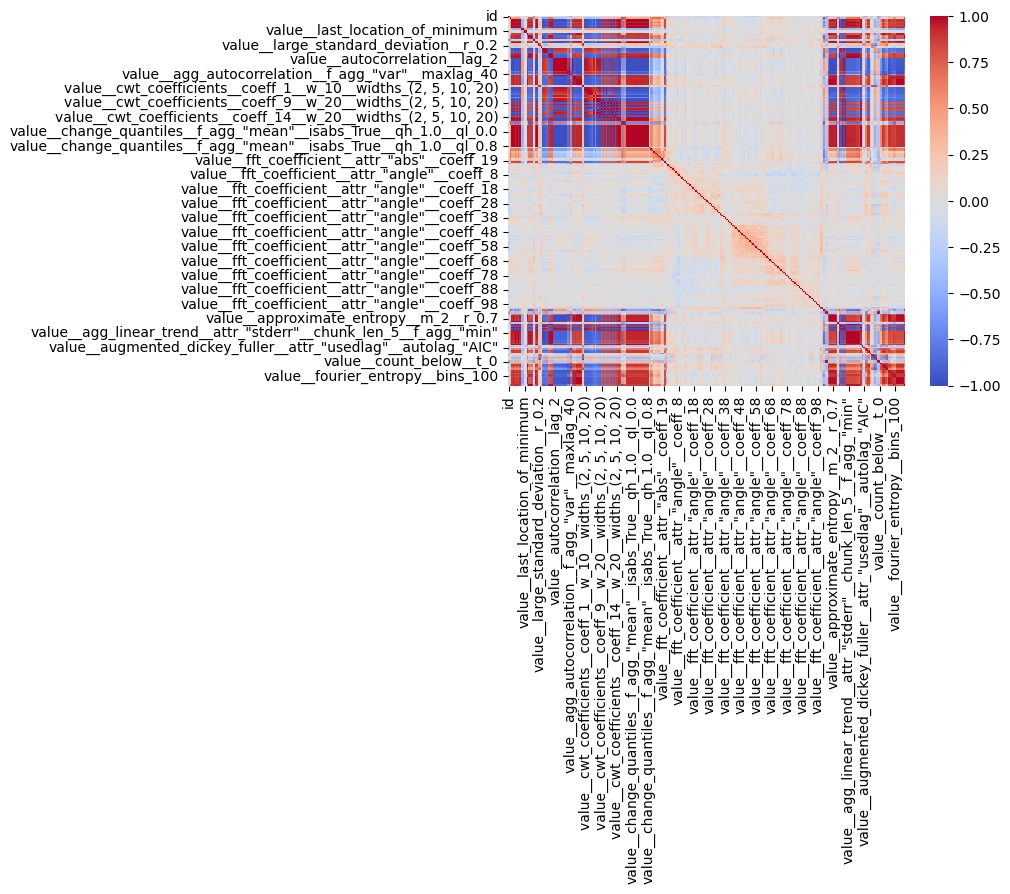

In [123]:
miracle = X_filtered_step_1
corr = miracle.corr()

# Visualize (optional)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

In [124]:
classes = ['rossler', 'lorenz63', 'aizawa', 'dadras', 'sprott']
sample_names = [cls for cls in classes for _ in range(100)]

In [125]:
X_filtered_step_1['sample_name'] = sample_names
cols = ['sample_name'] + [col for col in X_filtered_step_1.columns if col != 'sample_name']
X_filtered_step_1 = X_filtered_step_1[cols]

/tmp/ipykernel_26683/3198977122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_filtered_step_1['sample_name'] = sample_names


In [126]:
X_filtered_step_1

,sample_name,id,value__variance_larger_than_standard_deviation,value__abs_energy,value__mean_abs_change,value__standard_deviation,value__variance,value__root_mean_square,value__absolute_sum_of_changes,value__last_location_of_maximum,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,rossler,0.000000,0.0,0.000000,0.004906,0.009680,4.026456e-04,0.000000,0.004906,0.030795,...,0.170766,0.126670,0.137946,0.083342,0.238061,0.231454,0.231258,0.229304,0.226458,0.005876
1,rossler,0.002004,0.0,0.000006,0.004966,0.009794,4.084507e-04,0.000115,0.004966,0.030695,...,0.170766,0.126670,0.137946,0.083342,0.238003,0.231400,0.229245,0.227400,0.224633,0.005726
2,rossler,0.004008,0.0,0.000013,0.005039,0.009931,4.154634e-04,0.000249,0.005039,0.099007,...,0.170766,0.126670,0.137946,0.083342,0.238196,0.232699,0.230906,0.228167,0.226546,0.005366
3,rossler,0.006012,0.0,0.000082,0.005679,0.011248,4.849197e-04,0.001573,0.005679,0.337546,...,0.170766,0.126670,0.137946,0.083342,0.238005,0.231401,0.230644,0.228419,0.227220,0.005738
4,rossler,0.008016,0.0,0.000084,0.005719,0.011290,4.871634e-04,0.001615,0.005719,0.098305,...,0.170766,0.126670,0.137946,0.083342,0.237728,0.231135,0.229668,0.228550,0.227013,0.005606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,sprott,0.991984,0.0,0.000392,0.000344,0.000410,1.338154e-05,0.006866,0.000344,0.000903,...,0.000000,0.166026,0.137946,0.083342,0.134287,0.131088,0.130604,0.130333,0.129607,0.018549
496,sprott,0.993988,0.0,0.000394,0.000389,0.000905,2.995387e-05,0.006907,0.000389,0.000903,...,0.000000,0.292472,0.105202,0.083342,0.137407,0.132720,0.132395,0.130513,0.128856,0.018869
497,sprott,0.995992,0.0,0.000333,0.000119,0.000771,2.542583e-05,0.005933,0.000119,0.000903,...,0.000000,0.292472,0.105202,0.067337,0.077886,0.072129,0.071684,0.070911,0.070657,0.019179
498,sprott,0.997996,0.0,0.000341,0.000099,0.000003,9.735729e-08,0.006064,0.000099,0.000802,...,0.223823,0.292472,0.137946,0.150587,0.029614,0.029199,0.030137,0.030808,0.030983,0.019536


In [127]:
from matplotlib.colors import ListedColormap

my_colors = ['red', 'blue', 'green', 'purple', 'orange','black','cyan']
my_cmap = ListedColormap(my_colors)

In [128]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap


def higher_visualization(df, cmap):
    # Separate labels and features
    y_raw = df.iloc[:, 0].values  # labels (first column)
    X = df.iloc[:, 1:].values     # features (rest columns)

    # Convert string labels to integers
    le = LabelEncoder()
    y = le.fit_transform(y_raw)

    # Prepare figure with 1 row and 3 subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # PCA
    X_pca = PCA(n_components=2).fit_transform(X)
    axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
    axs[0].set_title("PCA")

    # t-SNE
    X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
    axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap)
    axs[1].set_title("t-SNE")

    # UMAP
    X_umap = umap.UMAP(random_state=0).fit_transform(X)
    axs[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=cmap)
    axs[2].set_title("UMAP")

    plt.tight_layout()
    plt.show()

/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


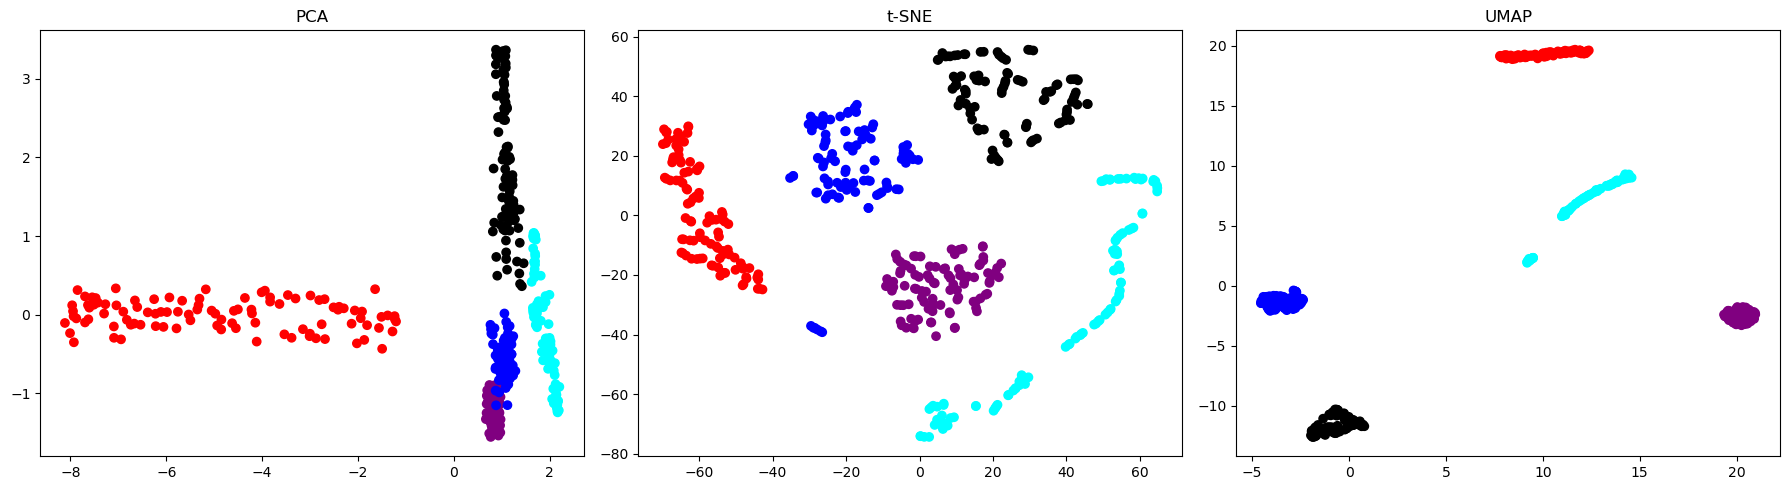

In [129]:
higher_visualization(X_filtered_step_1, cmap = my_cmap)

In [130]:
df_res

,id,sample_name,ic_x,ic_y,ic_z,x_lyap,x_corr_dim,x_ap_entropy
0,1,aizawa_0,0.100,0.100,0.100,0.000676,1.314140,0.067119
1,2,aizawa_1,0.109,0.109,0.109,0.001475,1.313687,0.067664
2,3,aizawa_2,0.118,0.118,0.118,0.001122,1.353055,0.069875
3,4,aizawa_3,0.127,0.127,0.127,0.001142,1.567679,0.087252
4,5,aizawa_4,0.136,0.136,0.136,0.000644,1.582371,0.088806
...,...,...,...,...,...,...,...,...
495,496,sprott_95,0.955,0.955,0.955,0.017265,0.892692,0.012123
496,497,sprott_96,0.964,0.964,0.964,0.025535,0.894955,0.012386
497,498,sprott_97,0.973,0.973,0.973,0.013841,0.832390,0.009279
498,499,sprott_98,0.982,0.982,0.982,0.013134,0.801393,0.008461


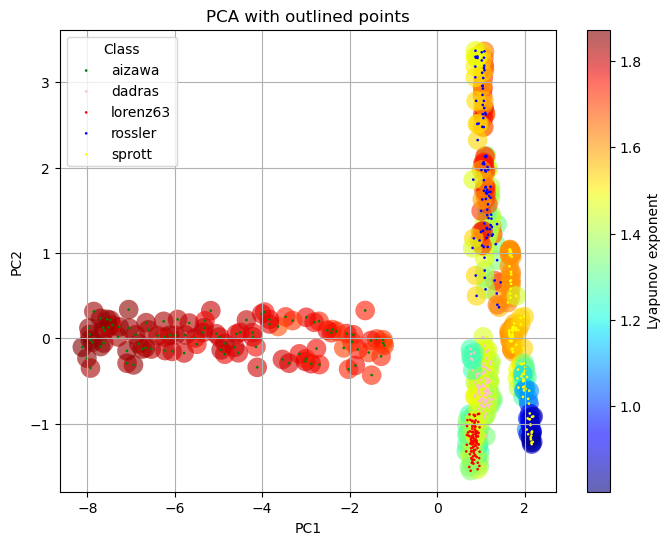

In [144]:
import matplotlib.pyplot as plt
X_pca = PCA(n_components=2).fit_transform(X_filtered_step_1.iloc[:, 1:])
pc1, pc2 = X_pca[:, 0], X_pca[:, 1]
classes = X_filtered_step_1['sample_name'].values
unique_classes = list(np.unique(classes))


# Continuous value to color by
#values = df_res['x_lyap'].values
#values = df_res['x_ap_entropy'].values
values = df_res['x_corr_dim'].values


plt.figure(figsize=(8, 6))




# Layer 2: Semi-transparent overlay color by continuous value
sc = plt.scatter(
    pc1, pc2,
    c=values,
    cmap='jet',
    s=200,
    alpha=0.6,  # translucent overlay
    edgecolor='none'
)


class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
for cls in unique_classes:
    mask = classes == cls
    plt.scatter(
        pc1[mask], pc2[mask],
        facecolors='none',
        edgecolor=class_colors.get(cls, 'black'),
        linewidths=0.9,
        label=cls,
        s=1
    )


# # Plot outlined points by class
# for cls in unique_classes:
#     mask = classes == cls
#     plt.scatter(
#         pc1[mask], pc2[mask],
#         facecolors='none',           # No fill color
#         edgecolor='black',            # Outline color for the class
#         linewidths=1.5,               # Adjust thickness here
#         label=cls,
#         s=60                          # Marker size
#     )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with outlined points')
plt.legend(title='Class')
plt.grid(True)
cbar = plt.colorbar(sc, label='Lyapunov exponent')
plt.show()


In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np

def fused_visualization(
    df, values, cmap='jet',
    class_colors=None,
    alpha_overlay=0.6,
    marker_size_overlay=200,
    marker_size_outline=10,
    linewidths_outline=0.9
):
    # Labels and features
    y_raw = df.iloc[:, 0].values       # First column = labels
    X = df.iloc[:, 1:].values           # Rest = features
    
    # Encode classes numerically
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    unique_classes = list(np.unique(y_raw))
    
    # Dimensionality reductions
    X_pca = PCA(n_components=2).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=5, random_state=0).fit_transform(X)
    X_umap = umap.UMAP(random_state=0).fit_transform(X)
    embeddings = [X_pca, X_tsne, X_umap]
    titles = ['PCA', 't-SNE', 'UMAP']

    # Set up subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for ax, coords, title in zip(axs, embeddings, titles):
        pc1, pc2 = coords[:, 0], coords[:, 1]

        # 1️⃣ Overlay continuous variable as translucent scatter
        sc = ax.scatter(
            pc1, pc2,
            c=values,
            cmap=cmap,
            s=marker_size_overlay,
            alpha=alpha_overlay,
            edgecolor='none'
        )

        # 2️⃣ Outline by class color
        for cls in unique_classes:
            mask = y_raw == cls
            ax.scatter(
                pc1[mask], pc2[mask],
                facecolors='none',
                edgecolor=class_colors.get(cls, 'black') if class_colors else 'black',
                linewidths=linewidths_outline,
                label=cls,
                s=marker_size_outline
            )
        ax.set_title(title)
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        ax.grid(True)

    # Single colorbar for continuous variable
    cbar = fig.colorbar(sc, ax=axs, label='Continuous value')
    axs[0].legend(title='Class')
    plt.tight_layout()
    plt.show()


/home/think/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/think/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_26683/1525188036.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


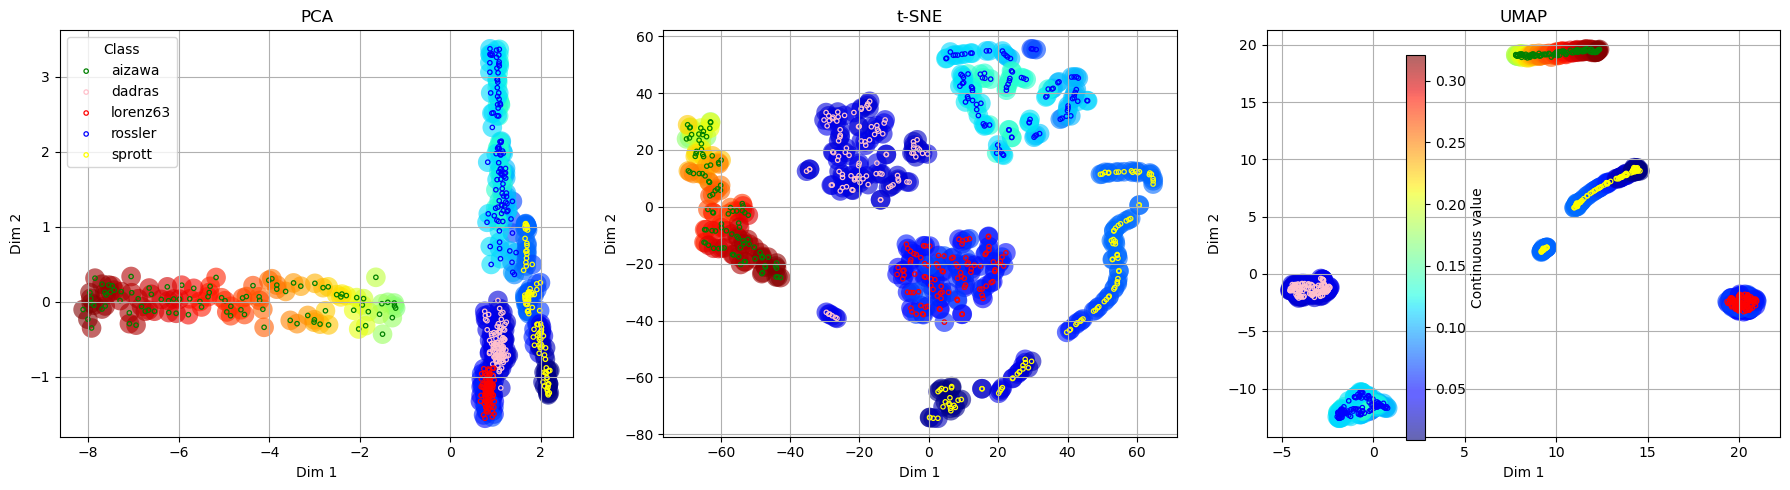

In [145]:
class_colors = {
    'lorenz63': 'red',
    'rossler': 'blue',
    'aizawa': 'green',
    'dadras': 'pink',
    'sprott': 'yellow'
}
fused_visualization(
    df=X_filtered_step_1,
    values=df_res['x_ap_entropy'].values,
    cmap='jet',
    class_colors=class_colors
)
